To perform binary classification on the housing dataset, we'll create a target variable using a threshold derived from the median house price. Samples with price above the median will be classified as expensive=0 , affordable otherwise.

The modules imports

In [15]:
import matplotlib.pylab as plt
import numpy as np
from pandas import read_csv,DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,roc_curve, roc_auc_score

Loading the data and applying standardization

In [3]:
data=read_csv("../data/california_housing.csv")
x=data.drop("MedianHouseValue",axis=1)
priceColumn=data["MedianHouseValue"]
averagePrice=np.median(priceColumn)
y=(priceColumn < averagePrice).astype(int)
scaler=StandardScaler()
scaledXNP=scaler.fit_transform(x)
scaledXDF=DataFrame(scaledXNP,columns=x.columns)

since the class is retrieved using the price and from the regression part we learned that removing features wont improve the model.

splitting the data

In [4]:
xTrain,xTest,yTrain,yTest=train_test_split(scaledXDF,y,random_state=42,test_size=0.3)

creating the model ,predicting and measuring performance using f-score,precision and recall score

In [13]:
model=LogisticRegression(tol=0.01,max_iter=2000,random_state=42)
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
precision = precision_score(yTest, pred)
print("Precision is : "+str(precision))
recall = recall_score(yTest, pred)
print("recallScore is : "+str(recall))
f1 = f1_score(yTest, pred)
print("F1Score is : "+str(f1))

Precision is : 0.8161103979460848
recallScore is : 0.8288787483702738
F1Score is : 0.8224450194049159


The model demonstrates strong precision in predicting affordable houses (1 denotes affordability).We can decrease tol(Lasso Regularizer sklearn) but we may overfitt the model.

drawing the curve `ROC` and calculating the area under the curve `AUC`

Area under the curve is : 0.8227300271940996


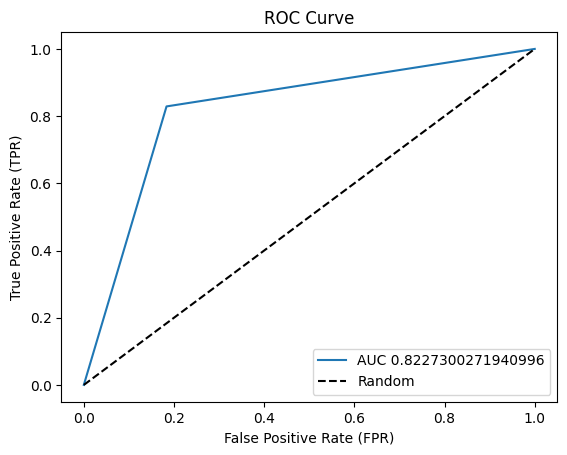

In [17]:
fpr, tpr, thresholds = roc_curve(yTest, pred)

auc = roc_auc_score(yTest, pred)
print("Area under the curve is : "+str(auc))

plt.plot(fpr, tpr, label="AUC "+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()